# GDP p/c plots

In this notebook, we will try to analyze and visualize some interesting gdp p/c trends around the world.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.transforms import offset_copy

In [2]:
sns.set_style("darkgrid")

In [3]:
gdp_data = pd.read_csv('gdp_pc_data.csv', skiprows=4, usecols=['Country Name'] + [str(year) for year in range(1960, 2025)]).set_index('Country Name').T

gdp_data.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,186.121835,NaN,121.939925,NaN,NaN,NaN,NaN,NaN,778.251707,...,NaN,NaN,NaN,452.263159,NaN,NaN,NaN,532.147504,221.559849,276.419784
1961,NaN,186.941781,NaN,127.454189,NaN,NaN,NaN,212.889663,NaN,971.338043,...,NaN,NaN,NaN,471.519797,NaN,NaN,NaN,545.657512,209.693206,279.016489
1962,NaN,197.402402,NaN,133.827044,NaN,NaN,NaN,210.805415,NaN,870.217491,...,NaN,NaN,NaN,495.786854,NaN,NaN,NaN,563.423009,202.281031,275.545608
1963,NaN,225.440494,NaN,139.008291,NaN,NaN,NaN,225.800630,NaN,852.972425,...,NaN,NaN,NaN,524.890141,NaN,NaN,NaN,604.536855,203.219451,277.005701
1964,NaN,208.999748,NaN,148.549379,NaN,NaN,NaN,243.897432,NaN,1176.200862,...,NaN,NaN,NaN,563.494445,NaN,NaN,NaN,645.873376,229.979246,281.744539


We will first visualize some known trends around the globe.

### Poland vs Greece

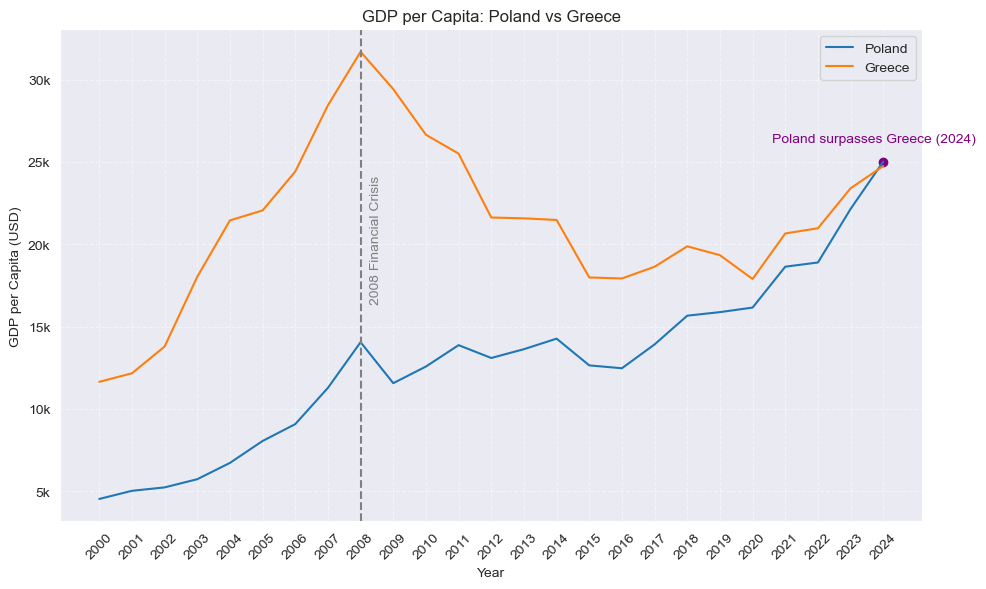

In [4]:
pol_gre = gdp_data.loc["2000":, ["Poland", "Greece"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(pol_gre.index, pol_gre["Poland"], label="Poland")
ax.plot(pol_gre.index, pol_gre["Greece"], label="Greece")

ax.set_title("GDP per Capita: Poland vs Greece")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# 2008 financial crisis annotation
ax.axvline(x="2008", color='gray', linestyle='--')
ax.text(8.3, ax.get_ylim()[1]*0.5, '2008 Financial Crisis', rotation=90, color='gray')

# Highlight the year Poland surpasses Greece
cross_year = pol_gre[pol_gre["Poland"] > pol_gre["Greece"]].index.min()
ax.scatter(cross_year, pol_gre.loc[cross_year, "Poland"], color="purple")
ax.text(cross_year,
        pol_gre.loc[cross_year, "Poland"] * 1.02,
        f"Poland surpasses Greece ({cross_year})",
        color="purple",
        transform=offset_copy(ax.transData, fig=ax.figure, x=-80, y=8, units='points')
    )

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### U.S. vs Japan

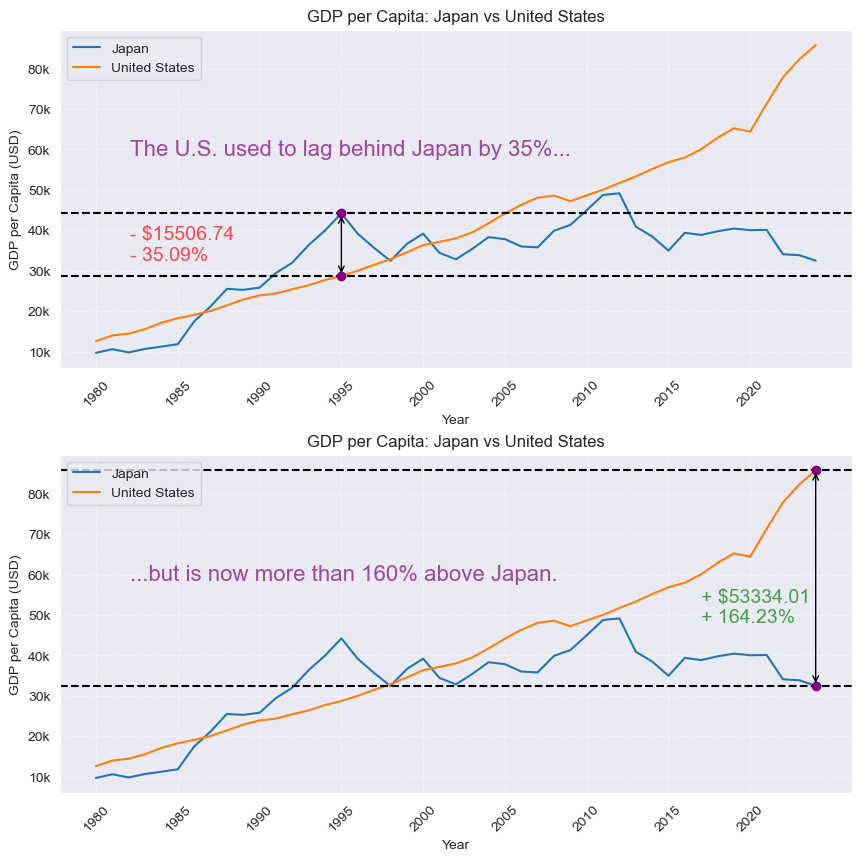

In [5]:
jap_us = gdp_data.loc["1980":, ["Japan", "United States"]]

fig, ax = plt.subplots(2, 1, figsize=(8.5, 8.5), constrained_layout=True)

for i in range(2):
        ax[i].plot(jap_us.index, jap_us["Japan"], label="Japan")
        ax[i].plot(jap_us.index, jap_us["United States"], label="United States")

        ax[i].set_title("GDP per Capita: Japan vs United States")
        ax[i].set_xlabel("Year")
        ax[i].set_ylabel("GDP per Capita (USD)")
        ax[i].legend()

        ax[i].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

        ax[i].set_xticks(np.arange(len(jap_us.index))[::5])
        ax[i].set_xticklabels(jap_us.index[::5], rotation=45)

ax[1].legend(loc="upper left")

ax[0].axhline(y=jap_us.loc["1995", "Japan"], color="black", linestyle='--', linewidth=1.5)
ax[0].axhline(y=jap_us.loc["1995", "United States"], color='black', linestyle='--', linewidth=1.5)

ax[1].axhline(y=jap_us.loc["2024", "Japan"], color='black', linestyle='--', linewidth=1.5)
ax[1].axhline(y=jap_us.loc["2024", "United States"], color='black', linestyle='--', linewidth=1.5)

Japan1995 = jap_us.loc["1995", "Japan"]
US1995 = jap_us.loc["1995", "United States"]
x_pos = "1995"
ax[0].annotate("",
            xy=(x_pos, US1995),
            xytext=(x_pos, Japan1995),
            arrowprops=dict(arrowstyle="<->", color="black", linewidth=1)
        )

ax[0].text(2.1, (Japan1995 + US1995) / 2, f'- ${abs((US1995 - Japan1995).round(2))}\n- {abs(((US1995-Japan1995)/Japan1995*100)).round(2)}%', 
        va='center', ha='left', color='red', alpha=0.7, fontsize=14)

ax[0].text(2.1, 60000, "The U.S. used to lag behind Japan by 35%...", va="center", ha="left", color="purple", alpha=0.7, fontsize=16)

Japan2024 = jap_us.loc["2024", "Japan"]
US2024 = jap_us.loc["2024", "United States"]
x_pos = "2024"
ax[1].annotate("",
            xy=(x_pos, US2024),
            xytext=(x_pos, Japan2024),
            arrowprops=dict(arrowstyle="<->", color="black", linewidth=1)
        )

ax[1].text(2.1, 60000, "...but is now more than 160% above Japan.", va="center", ha="left", color="purple", alpha=0.7, fontsize=16)

ax[1].text(37, 52000, f'+ ${abs((US2024 - Japan2024).round(2))}\n+ {abs(((US2024-Japan2024)/Japan2024*100)).round(2)}%', 
        va='center', ha='left', color='green', alpha=0.7, fontsize=14)


ax[0].scatter("1995", jap_us.loc["1995", "Japan"], color="purple", zorder=2)
ax[0].scatter("1995", jap_us.loc["1995", "United States"], color="purple", zorder=2);

ax[1].scatter("2024", jap_us.loc["2024", "Japan"], color="purple", zorder=2)
ax[1].scatter("2024", jap_us.loc["2024", "United States"], color="purple", zorder=2);

ax[0].grid(True, linestyle='--', alpha=0.5)
ax[1].grid(True, linestyle='--', alpha=0.5)

### Spain vs Korea

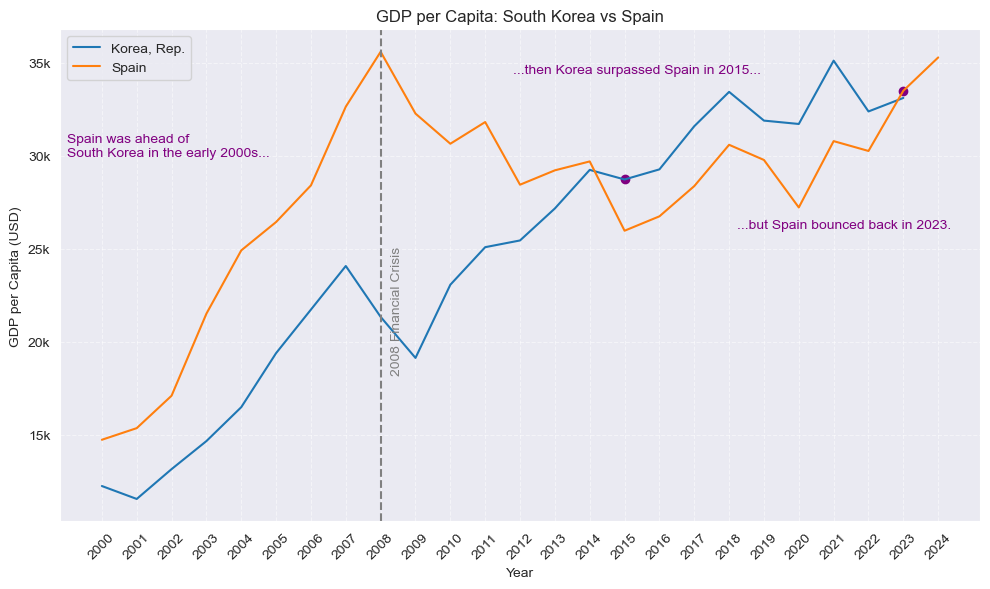

In [6]:
spa_kor = gdp_data.loc["2000":, ["Korea, Rep.", "Spain"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(spa_kor.index, spa_kor["Korea, Rep."], label="Korea, Rep.")
ax.plot(spa_kor.index, spa_kor["Spain"], label="Spain")

ax.set_title("GDP per Capita: South Korea vs Spain")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# 2008 financial crisis annotation
ax.axvline(x="2008", color='gray', linestyle='--')
ax.text(8.3, ax.get_ylim()[1]*0.5, '2008 Financial Crisis', rotation=90, color='gray')

# Mention the beginning of the century
ax.text("2000", 30000, "Spain was ahead of\nSouth Korea in the early 2000s...", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=-25, units='points'))

# Highlight the year Korea, Rep. surpasses Spain
cross_year = spa_kor[spa_kor["Korea, Rep."] > spa_kor["Spain"]].index.min()
ax.scatter(cross_year, spa_kor.loc[cross_year, "Korea, Rep."], color="purple")
ax.text(cross_year,
        spa_kor.loc[cross_year, "Korea, Rep."] * 1.20,
        f"...then Korea surpassed Spain in {cross_year}...",
        color="purple",
        transform=offset_copy(ax.transData, fig=ax.figure, x=-80, units='points')
    )

# Highlight the year Spain bounces back
cross_year_spain = spa_kor[spa_kor["Spain"] > spa_kor["Korea, Rep."]].index.max()
ax.scatter(cross_year_spain, spa_kor.loc[cross_year_spain, "Spain"], color="purple")
ax.text(cross_year_spain,
        spa_kor.loc[cross_year_spain, "Spain"] * 0.78,
        f"...but Spain bounced back in {cross_year_spain}.",
        color="purple",
        transform=offset_copy(ax.transData, fig=ax.figure, x=-120, units='points')
    )

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show();

### Brazil vs China

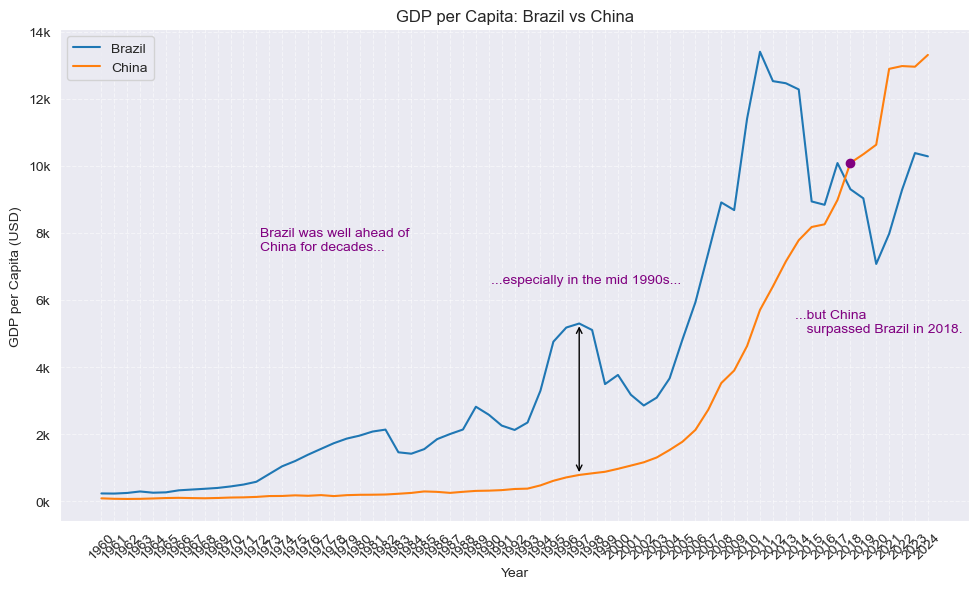

In [7]:
bra_chn = gdp_data.loc["1960":, ["Brazil", "China"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(bra_chn.index, bra_chn["Brazil"], label="Brazil")
ax.plot(bra_chn.index, bra_chn["China"], label="China")

ax.set_title("GDP per Capita: Brazil vs China")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Mention decades of Brazil ahead of China
ax.text("1975", 7500, "Brazil was well ahead of\nChina for decades...", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=-25, units='points'))

# Highlight the major difference between the two in 1997
x_pos = "1997"
ax.annotate("",
            xy=(x_pos, bra_chn.loc[x_pos, "Brazil"]),
            xytext=(x_pos, bra_chn.loc[x_pos, "China"]),
            arrowprops=dict(arrowstyle="<->", color="black", linewidth=1)
        )
ax.text("1995", 6500, "...especially in the mid 1990s...", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=-45, units='points'))

# Highlight the year Brazil surpasses China
cross_year = bra_chn[bra_chn["China"] > bra_chn["Brazil"]].index.min()
ax.scatter(cross_year, bra_chn.loc[cross_year, "China"], color="purple", zorder=2)
ax.text(cross_year,
        bra_chn.loc[cross_year, "China"] * 0.5,
        f"...but China\n   surpassed Brazil in {cross_year}.",
        color="purple",
        transform=offset_copy(ax.transData, fig=ax.figure, x=-40, units='points')
    )

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show();

### Ireland vs U.K. and Germany

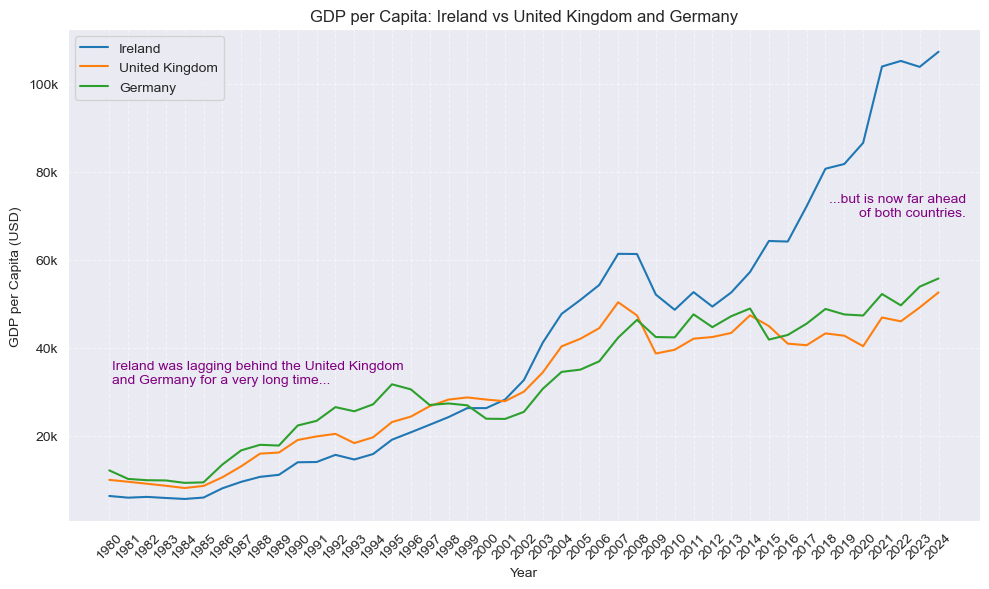

In [8]:
bra_chn = gdp_data.loc["1980":, ["Ireland", "United Kingdom", "Germany"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(bra_chn.index, bra_chn["Ireland"], label="Ireland")
ax.plot(bra_chn.index, bra_chn["United Kingdom"], label="United Kingdom")
ax.plot(bra_chn.index, bra_chn["Germany"], label="Germany")

ax.set_title("GDP per Capita: Ireland vs United Kingdom and Germany")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Mention how Ireland used to be less wealthy than the United Kingdom and Germany
ax.text("1982", 32000, "Ireland was lagging behind the United Kingdom\nand Germany for a very long time...", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=-25, units='points'))

# Highlight how Ireland is ahead of both now
ax.text("2024", 70000, "...but is now far ahead\nof both countries.", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=20, units='points'), horizontalalignment='right')

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show();

### Luxembourg vs UAE

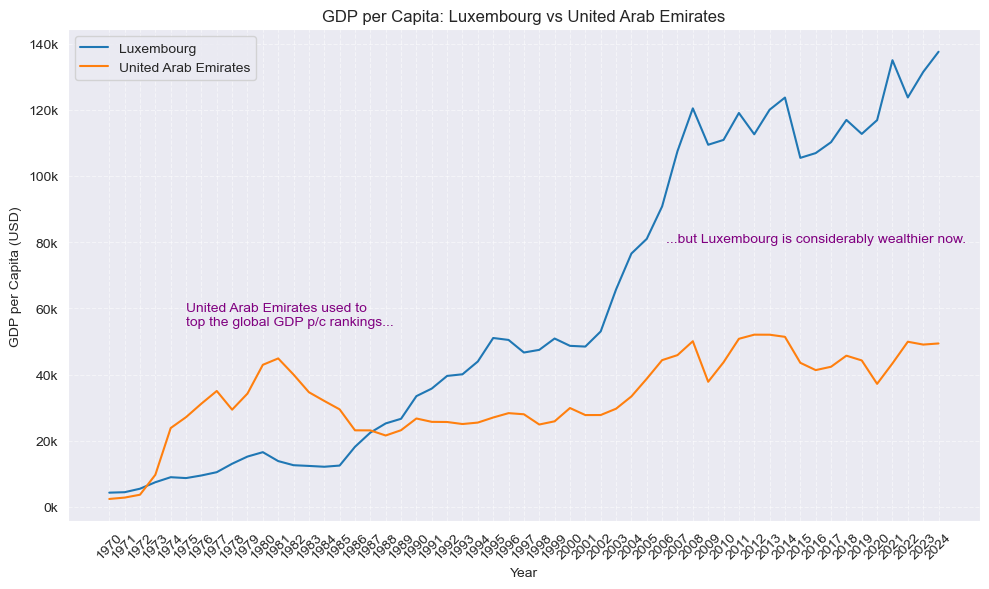

In [9]:
lux_uae = gdp_data.loc["1970":, ["Luxembourg", "United Arab Emirates"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(lux_uae.index, lux_uae["Luxembourg"], label="Luxembourg")
ax.plot(lux_uae.index, lux_uae["United Arab Emirates"], label="United Arab Emirates")

ax.set_title("GDP per Capita: Luxembourg vs United Arab Emirates")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Mention how United Arab Emirates used to top the global GDP p/c rankings
ax.text("1975", 55000, "United Arab Emirates used to\ntop the global GDP p/c rankings...", color="purple")

# Highlight how Luxembourg is considerably wealthier now
ax.text("2024", 80000, "...but Luxembourg is considerably wealthier now.", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=20, units='points'), horizontalalignment='right')

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show();

### The United States vs Italy

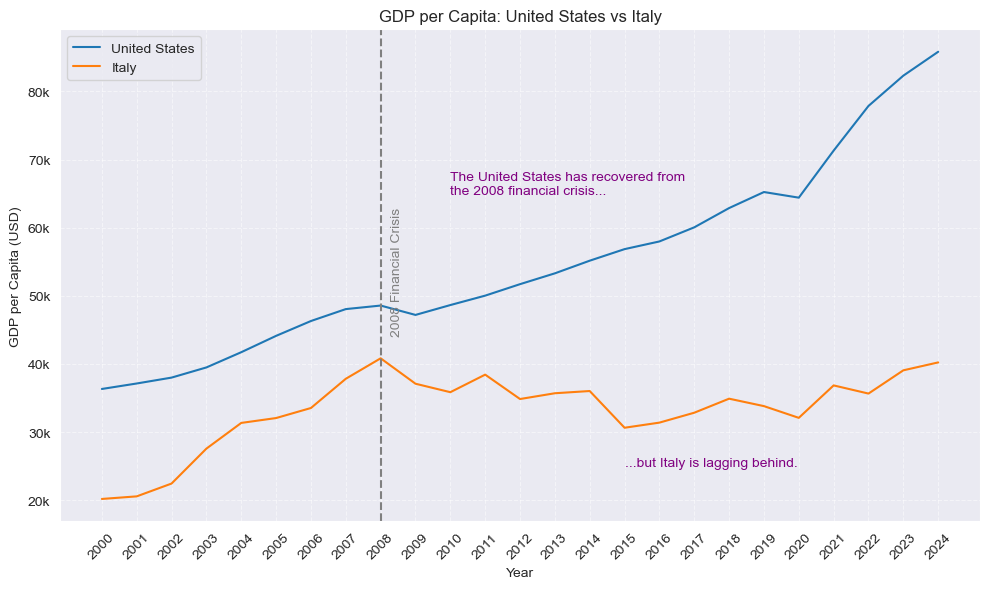

In [10]:
ger_ita = gdp_data.loc["2000":, ["United States", "Italy"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ger_ita.index, ger_ita["United States"], label="United States")
ax.plot(ger_ita.index, ger_ita["Italy"], label="Italy")

ax.set_title("GDP per Capita: United States vs Italy")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# 2008 financial crisis annotation
ax.axvline(x="2008", color='gray', linestyle='--')
ax.text(8.3, ax.get_ylim()[1]*0.5, '2008 Financial Crisis', rotation=90, color='gray')

# Mention how the United States recovered from the 2008 crisis
ax.text("2010", 65000, "The United States has recovered from\nthe 2008 financial crisis...", color="purple")

# Mention how Italy is still struggling to recover from the 2008 crisis
ax.text("2015", 25000, "...but Italy is lagging behind.", color="purple")

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Nigeria vs Botswana

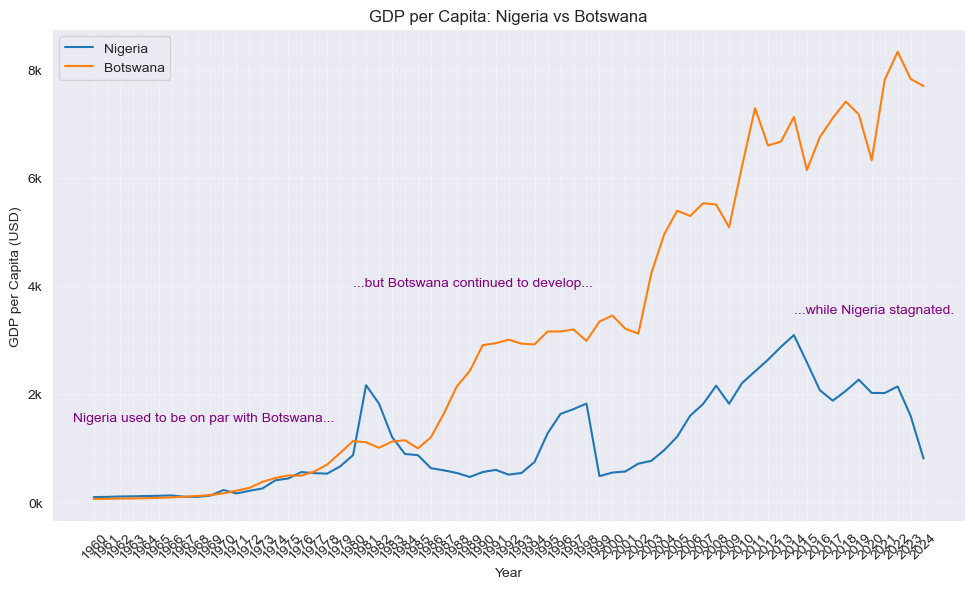

In [11]:
nig_bot = gdp_data.loc["1960":, ["Nigeria", "Botswana"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(nig_bot.index, nig_bot["Nigeria"], label="Nigeria")
ax.plot(nig_bot.index, nig_bot["Botswana"], label="Botswana")

ax.set_title("GDP per Capita: Nigeria vs Botswana")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Mention how the Nigeria used to be on par with Botswana
ax.text("1960", 1500, "Nigeria used to be on par with Botswana...", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=-15, units='points'))

# Mention how Botswana continued to develop
ax.text("1980", 4000, "...but Botswana continued to develop...", color="purple")

# Mention how Nigeria stagnated
ax.text("2014", 3500, "...while Nigeria stagnated.", color="purple")

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Burundi vs Rwanda

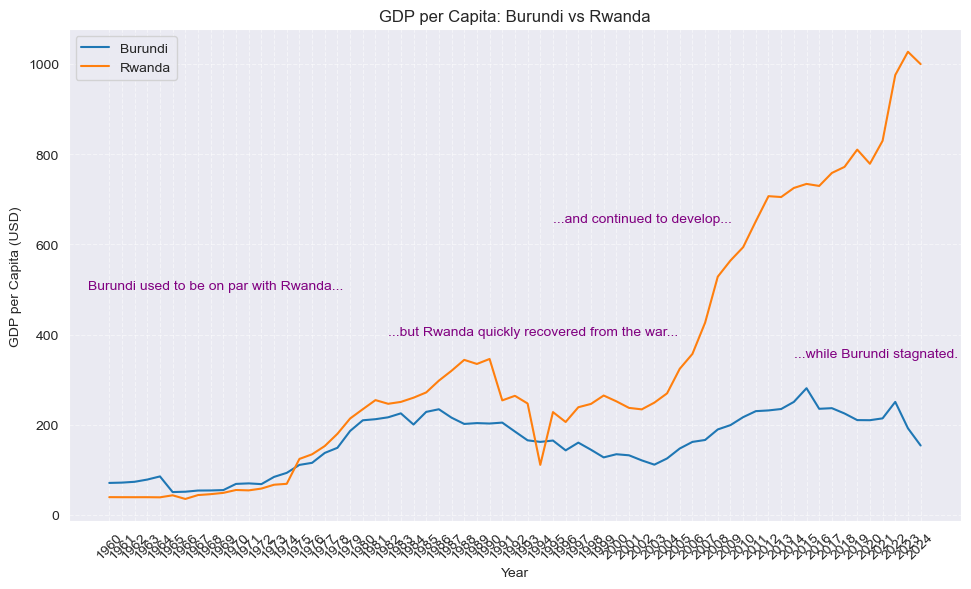

In [12]:
bur_rwa = gdp_data.loc["1960":, ["Burundi", "Rwanda"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(bur_rwa.index, bur_rwa["Burundi"], label="Burundi")
ax.plot(bur_rwa.index, bur_rwa["Rwanda"], label="Rwanda")

ax.set_title("GDP per Capita: Burundi vs Rwanda")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
# ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Mention how the Burundi used to be on par with Rwanda
ax.text("1960", 500, "Burundi used to be on par with Rwanda...", color="purple", transform=offset_copy(ax.transData, fig=ax.figure, x=-15, units='points'))

# Mention how Rwanda quickly recovered from the war
ax.text("1982", 400, "...but Rwanda quickly recovered from the war...", color="purple")

# Mention how Rwuanda continued to develop
ax.text("1995", 650, "...and continued to develop...", color="purple")

# Mention how Burundi stagnated
ax.text("2014", 350, "...while Burundi stagnated.", color="purple")

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Lithuania vs Russia

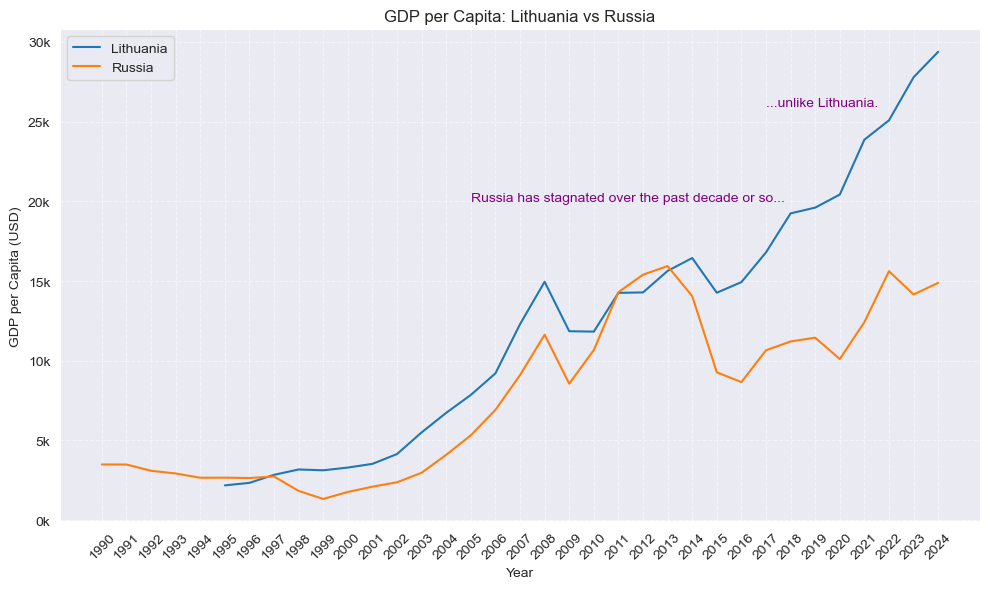

In [13]:
lit_rus = gdp_data.loc["1990":, ["Lithuania", "Russian Federation"]]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(lit_rus.index, lit_rus["Lithuania"], label="Lithuania")
ax.plot(lit_rus.index, lit_rus["Russian Federation"], label="Russia")

ax.set_title("GDP per Capita: Lithuania vs Russia")
ax.set_xlabel("Year")
ax.set_ylabel("GDP per Capita (USD)")
ax.legend()

# y-axis formatting to show in 'k' (thousands)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x/1000)}k"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Highlight how the Russia has stagnated over the past decade
ax.text("2005", 20000, "Russia has stagnated over the past decade or so...", color="purple")

# Highlight how Lithuania continued to develop
ax.text("2017", 26000, "...unlike Lithuania.", color="purple")

ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()